# <span style = "color:coral;font-size:40px">Movie Genere</span>

### Import necessary Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

### Read "Movie Genere" data set

In [5]:
df = pd.read_csv('Movie Genere data set.csv')

In [6]:
df.head()

,review,sentiment
0,This movie is just crap. Even though the direc...,0
1,Another detailed work on the subject by Dr Dwi...,1
2,THE CAT O'NINE TAILS (Il Gatto a Nove Code) <b...,0
3,"Like with any movie genre, there are good gang...",0
4,I watched it with my mom and we were like...<b...,0


### Check Info

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49969 entries, 0 to 49968
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     49969 non-null  object
 1   sentiment  49969 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 780.9+ KB


### View Descriptive Stats

In [10]:
df.describe()

,sentiment
count,49969.000000
mean,0.499950
std,0.500005
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


### Check for imbalanced data

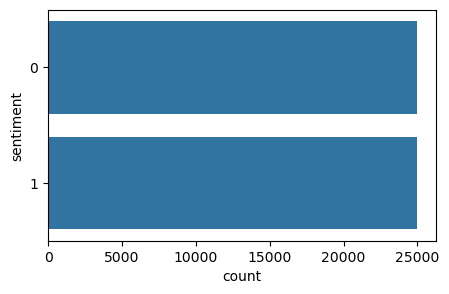

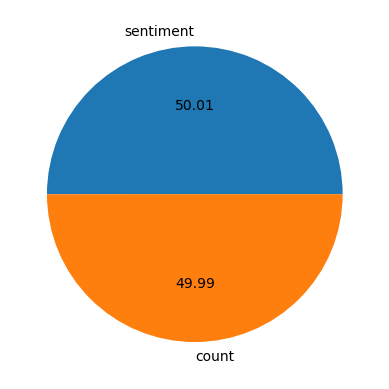

In [12]:
plt.figure(figsize = (5,3))
sns.countplot(y = df['sentiment'])
plt.show()

plt.pie(df['sentiment'].value_counts(), labels = ['sentiment','count'], autopct='%0.2f')
plt.show()

### Create a function to Preprocess the review column

In [14]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [15]:
def preprocess(sentence):
    text = re.sub(r"[^a-zA-Z0-9]"," ",sentence).split()
    words = [x.lower() for x in text if x not in stopwords.words('english')]
    lemma = WordNetLemmatizer()
    word = [lemma.lemmatize(word,'v') for word in words ]
    word = ' '.join(word)
    return word

### Print some text after applying the function

In [17]:
for i in range(10):
    print(df['review'][i])
    print()

This movie is just crap. Even though the directors claim to be part of that oi-culture, it's still a very, very bad directorial debut. The topic itself is very interesting and I accept the bad acting due to the fact, that they are all amateurs and never acted before, but the worst thing about this film are the dialogs and very unexperienced and naive directing. There's no timing at all in that movie. I felt like the directors were so exited to do that movie (it's their first feature), that they actually never really asked themselves, what story they wanna tell. I met Ben (one of the directors) on several occasions and he's a nice and thoughtful guy, but that doesn't make him a director. I think, that "American History X" is full of clichÃ©s, but somehow manages to transport a story. "Oi!Warning" is full of clichÃ©s, doesn't tell anything new or provocative and (-that's the sad thing about this movie) it's far from any Oi!-Reality.<br /><br />If you wanna see weird but great German film

### Split the dataset into Input (X) & Target (y) variable

In [19]:
x = df['review']
y = df['sentiment']

In [20]:
df

,review,sentiment
0,This movie is just crap. Even though the direc...,0
1,Another detailed work on the subject by Dr Dwi...,1
2,THE CAT O'NINE TAILS (Il Gatto a Nove Code) <b...,0
3,"Like with any movie genre, there are good gang...",0
4,I watched it with my mom and we were like...<b...,0
...,...,...
49964,This movie is terrible. It's about some no bra...,0
49965,"Well, what was fun... except for the fun part....",0
49966,By the time this film was released I had seen ...,0
49967,"Well, if you like pop/punk, punk, ska, and a t...",0


In [21]:
from sklearn.feature_extraction.text import CountVectorizer

In [22]:
df = pd.DataFrame(x)

In [23]:
vectorizer = CountVectorizer(binary=True, max_features=10000)  # Limit to 10,000 features
binary_matrix = vectorizer.fit_transform(df['review'])

### Create Keras tokenizer object with 5000 max words

In [25]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [26]:
tokenizer = Tokenizer(num_words=5000)

### Split the dataset into Training & Testing set

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.20)

### Create keras Sequential Model with LSTM Layers

In [30]:
tokenizer.fit_on_texts(x_train)

In [31]:
vocab_size = len(tokenizer.word_index) + 1

In [32]:
def text_encoding(txt):
    # texts_to_sequences Transforms each text in texts to a sequence of integers.
    encoded_docs = tokenizer.texts_to_sequences(txt)
    
    # pad_sequences is used to ensure that all sequences in a list have the same length.
    padded_sequence = pad_sequences(encoded_docs, maxlen=128)    
       
    return padded_sequence

In [33]:
x_train = text_encoding(x_train)
x_test = text_encoding(x_test)

In [34]:
vocab_size

111771

In [35]:
from keras import Sequential
from keras import layers

In [36]:
print(f'shape of x_train : {(x_train.shape)}')
print(f'shape of x_test : {(x_test.shape)}')

shape of x_train : (39975, 128)
shape of x_test : (9994, 128)


In [37]:
model = Sequential()
model.add(layers.Embedding(vocab_size, 128,input_length = 128))
model.add(layers.LSTM(128,  return_sequences=True))
model.add(layers.Dropout(0.2))
model.add(layers.LSTM(128))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dropout(0.2))

model.add(layers.Dense(1, activation='sigmoid'))

C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


### Model Summary

In [39]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

### Compile the Model

In [41]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

### Train the model with our training set

In [43]:
model.fit(x_train, y_train, epochs=5, validation_split = 0.2)

Epoch 1/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 495s 479ms/step - accuracy: 0.7501 - loss: 0.4944 - val_accuracy: 0.8613 - val_loss: 0.3280
Epoch 2/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 496s 494ms/step - accuracy: 0.8888 - loss: 0.2809 - val_accuracy: 0.8622 - val_loss: 0.3142
Epoch 3/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 426s 425ms/step - accuracy: 0.9157 - loss: 0.2226 - val_accuracy: 0.8813 - val_loss: 0.2870
Epoch 4/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 367s 367ms/step - accuracy: 0.9337 - loss: 0.1774 - val_accuracy: 0.8678 - val_loss: 0.3045
Epoch 5/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 351s 351ms/step - accuracy: 0.9525 - loss: 0.1339 - val_accuracy: 0.8718 - val_loss: 0.3377


### Make prediction with X_test

In [45]:
y_pred = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 30s 82ms/step


In [46]:
len(y_pred)

9994

In [47]:
len(y_test)

9994

In [48]:
y_pred = [np.argmax(i) for i in y_pred]

In [49]:
y_pred[0]

0

### Evaluate the model

In [51]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

### Accuracy Score

In [53]:
accuracy_score(y_test, y_pred)

0.4898939363618171

### Check Confusion Matrix

<Axes: >

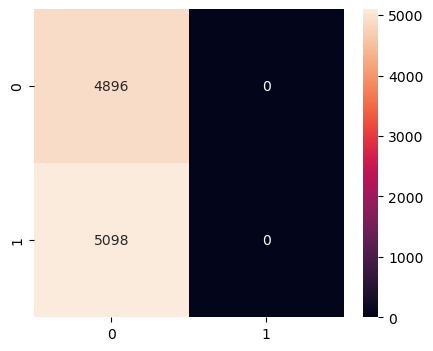

In [55]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt='d')

### Print Classification Report

In [57]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.49      1.00      0.66      4896
           1       0.00      0.00      0.00      5098

    accuracy                           0.49      9994
   macro avg       0.24      0.50      0.33      9994
weighted avg       0.24      0.49      0.32      9994



C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# <span style = "color:coral;font-size:40px">Thank You</span>

***